In [1]:
%pylab inline
from scipy.ndimage import imread

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy as sp

In [3]:
from scipy import signal 
from scipy import misc

In [4]:
!ls Data

im1-a.png  im2-18.png im2-31.png im2-45.png im2-59.png im2-72.png im2-86.png
im1-b.png  im2-19.png im2-32.png im2-46.png im2-6.png  im2-73.png im2-87.png
im1-c.png  im2-2.png  im2-33.png im2-47.png im2-60.png im2-74.png im2-88.png
im1-d.png  im2-20.png im2-34.png im2-48.png im2-61.png im2-75.png im2-89.png
im1-e.png  im2-21.png im2-35.png im2-49.png im2-62.png im2-76.png im2-9.png
im2-0.png  im2-22.png im2-36.png im2-5.png  im2-63.png im2-77.png im2-90.png
im2-1.png  im2-23.png im2-37.png im2-50.png im2-64.png im2-78.png im2-91.png
im2-10.png im2-24.png im2-38.png im2-51.png im2-65.png im2-79.png im2-92.png
im2-11.png im2-25.png im2-39.png im2-52.png im2-66.png im2-8.png  im2-93.png
im2-12.png im2-26.png im2-4.png  im2-53.png im2-67.png im2-80.png im2-94.png
im2-13.png im2-27.png im2-40.png im2-54.png im2-68.png im2-81.png im2-95.png
im2-14.png im2-28.png im2-41.png im2-55.png im2-69.png im2-82.png im2-96.png
im2-15.png im2-29.png im2-42.png im2-56.png im2-7.png  im2-83.png im2-97.png


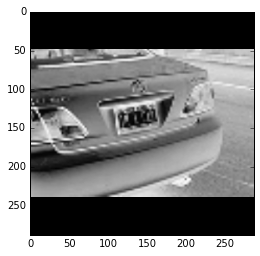

In [5]:
im = imread("Data/im2-12.png", flatten = True)
imshow(im, cmap = cm.Greys)

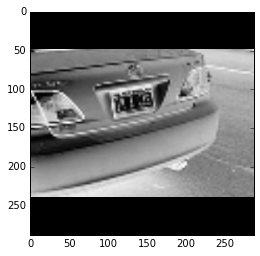

In [6]:
im = imread("Data/im2-2.png", flatten = True)
imshow(im, cmap = cm.Greys)

In [7]:
##############################################
#------ Task 1: Resizing all photos ---------#
##############################################
def fig_input(file_name, cmap = cm.Greys):
    tmp = imread(file_name, flatten = True)
    imshow(tmp, cmap)
    return tmp

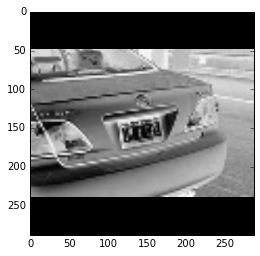

In [8]:
str1 = "Data/im2-1.png"
fig1 = fig_input(str1)

In [29]:
fig2.shape

(288, 288)

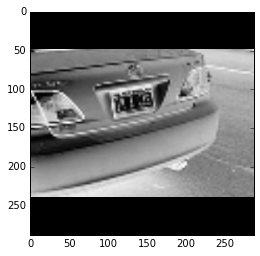

In [9]:
str2 = "Data/im2-2.png"
fig2 = fig_input(str2)

In [10]:
sp.misc.imresize?

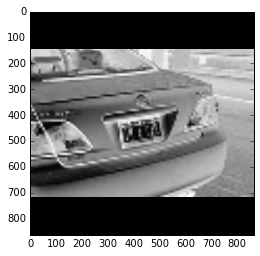

In [11]:
re_fig1 = sp.misc.imresize(fig1, 300)
imshow(re_fig1, cmap = cm.Greys)

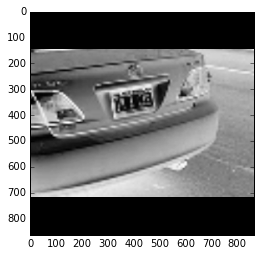

In [12]:
re_fig2 = sp.misc.imresize(fig2, 300)
imshow(re_fig2, cmap = cm.Greys)

In [13]:
from scipy.signal.signaltools import correlate2d

In [24]:
correlate2d?

In [14]:
corr = signal.correlate2d(re_fig1, re_fig2, boundary='symm', mode='same')

In [ ]:
imshow(corr, cmap = cm.Greys)

In [15]:
!pwd

/Users/kevinli/src/Python_For_Data_Science/Kevin/Homework1


# Solution

In [16]:
from scipy.ndimage import imread
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [20]:
import os

In [28]:
###############################################################
#---------- Automating the collection of all images ----------#
###############################################################
image_dir = "Data"
img_names = [x for x in sorted(os.listdir(image_dir)) if x.startswith("im2-")]
img_paths = [os.path.join(image_dir, x) for x in img_names]

In [35]:
ori_size = fig2.shape
ori_size[0]*3

864

In [52]:
########################################################################
#----- Allocating Arrays for Resized Figures and threshold images -----#
########################################################################
ori_size = fig2.shape
resized = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
thresholded = np.empty((len(img_paths), ori_size[0]*3, ori_size[1]*3))
for i, (img_name, img_path) in enumerate(zip(img_names, img_paths)):
    #print(i)
    resized[i] = zoom(sp.ndimage.imread(img_path, flatten = True), 3)
    #-------------------- Thresholding ------------------#
    # We will threshold the images s.t. 1/2 of the image is dark.
    # W/O the thresholding, the correlation will always be the highest at 
    # the center of the image
    tmp = resized[i].copy()
    tmp[:150] = 0
    tmp[715:] = 0
    tmp[tmp <= np.percentile(tmp[150:715].ravel(), 50)] = 0
    thresholded [i] = tmp

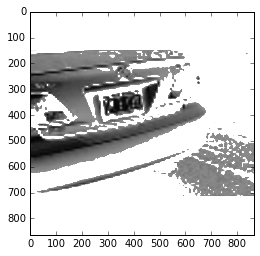

In [59]:
imshow(thresholded[8], cmap = cm.Greys)

In [66]:
zoom?

In [64]:
thresholded[1].shape

(864, 864)

In [65]:
resized[1].shape

(864, 864)

In [60]:
fftconvolve?

In [70]:
def shift(im, im_base):
    '''The function computes the offset between 2 images'''
    # Correlate2d is too slow, so we will try to use fftconvolve 
    corr = fftconvolve(im_base[::-1, ::-1], im, mode = 'full')
    # Finding the index of the highest correlation
    idx = np.unravel_index(np.abs(corr.argmax()), corr.shape)
    #print(idx)
    # Computing the offset
    origin = np.array(corr.shape)/2
    offset = idx - origin
    return offset

In [79]:
offsets = -np.array([shift(im, thresholded[0]) for im in thresholded], dtype = 'f8')

In [80]:
np.set_printoptions(formatter = {'float': lambda x: "% 7.2f" %x})
print(offsets)

[[   0.50    0.50]
 [   8.50  -38.50]
 [ 104.50   -7.50]
 [  57.50 -165.50]
 [  63.50  -22.50]
 [  25.50 -103.50]
 [  56.50   -7.50]
 [ 177.50  -18.50]
 [ 114.50   33.50]
 [  56.50  -72.50]
 [ 107.50  -95.50]
 [  41.50  -22.50]
 [ 122.50   -6.50]
 [ -47.50  -80.50]
 [  79.50 -108.50]
 [  48.50  -96.50]
 [  16.50 -106.50]
 [ 113.50  -62.50]
 [ 121.50  -61.50]
 [   0.50 -166.50]
 [  46.50   49.50]
 [  52.50   57.50]
 [ 138.50    0.50]
 [ 178.50   33.50]
 [  81.50 -126.50]
 [ 114.50   88.50]
 [  82.50   17.50]
 [ 169.50  -56.50]
 [  -0.50 -111.50]
 [ 105.50    0.50]
 [ 158.50   64.50]
 [  99.50   50.50]
 [  56.50  -43.50]
 [  45.50  136.50]
 [   0.50    2.50]
 [  81.50   -7.50]
 [ 113.50   -1.50]
 [  92.50   13.50]
 [  80.50  -23.50]
 [  62.50   10.50]
 [   8.50 -147.50]
 [  50.50  -89.50]
 [  81.50  -98.50]
 [ 137.50   29.50]
 [ 138.50   -4.50]
 [   7.50   33.50]
 [ 130.50    8.50]
 [  57.50  -57.50]
 [  67.50 -141.50]
 [   0.50  -30.50]
 [  88.50 -136.50]
 [  65.50  -35.50]
 [ -12.50   

In [81]:
#------ Shifting the original (unthresholded but zoomed) imaged ------#
im_shift = sp.ndimage.interpolation.shift
shifted = np.array([im_shift(im, offset) for im, offset in zip(resized, offsets)])

In [86]:
#------ Combining all images to form a Super-resolution image -------#
sr_img = np.mean(shifted, axis = 0)

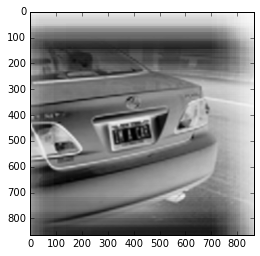

In [87]:
plt.imshow(sr_img, cmap = cm.Greys)

The license plate says "I'm a car"